***IN PROGRESS***

**NY Red Bulls New-Transfer Pass-Network Analysis**

Created by Elijah Weston-Capulong on February 24, 2025, for the NY Red Bulls Data Science team.

This analysis will explore how recent European signing, Eric Maxim Chupo-Moting, could impact the New York Red Bulls' tactical outlay, setup, and performance through pass-network analysis.

In [324]:
# Import necessary libraries
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch, Sbopen
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
print('Libraries imported successfully')

Libraries imported successfully


In [325]:
# Open parser
parser = Sbopen()

In [326]:
# Load in the StatsBomb data
sb_data = sb.competitions()

# Print individual competitions
print(sb_data['competition_name'].unique())

# Filter for Bundesliga, Ligue 1, African Cup of Nations, FIFA World Cup, and UEFA Champions League
bundesliga = sb_data.loc[sb_data['competition_name'] == '1. Bundesliga']
ligue1 = sb_data.loc[sb_data['competition_name'] == 'Ligue 1']
african_cup = sb_data.loc[sb_data['competition_name'] == 'African Cup of Nations']
fifa_world_cup = sb_data.loc[sb_data['competition_name'] == 'FIFA World Cup']
uefa_champions_league = sb_data.loc[sb_data['competition_name'] == 'Champions League']

# Merge the dataframes
chupo_moting_data = pd.concat([bundesliga, ligue1, african_cup, fifa_world_cup, uefa_champions_league])
chupo_moting_data = chupo_moting_data.reset_index(drop=True)
chupo_moting_data


['1. Bundesliga' 'African Cup of Nations' 'Champions League'
 'Copa America' 'Copa del Rey' "FA Women's Super League"
 'FIFA U20 World Cup' 'FIFA World Cup' 'Indian Super league' 'La Liga'
 'Liga Profesional' 'Ligue 1' 'Major League Soccer'
 'North American League' 'NWSL' 'Premier League' 'Serie A' 'UEFA Euro'
 'UEFA Europa League' "UEFA Women's Euro" "Women's World Cup"]


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,7,235,France,Ligue 1,male,False,False,2022/2023,2024-06-11T00:50:53.277411,2024-06-26T08:17:36.043856,2024-06-26T08:17:36.043856,2024-06-11T00:50:53.277411
3,7,108,France,Ligue 1,male,False,False,2021/2022,2024-06-03T16:46:00.665854,2024-06-03T16:49:55.355195,2024-06-03T16:49:55.355195,2024-06-03T16:46:00.665854
4,7,27,France,Ligue 1,male,False,False,2015/2016,2024-01-07T06:23:44.277971,None,None,2024-01-07T06:23:44.277971
5,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
6,43,106,International,FIFA World Cup,male,False,True,2022,2024-05-15T10:23:32.854925,2024-06-11T11:30:50.462448,2024-06-11T11:30:50.462448,2024-05-15T10:23:32.854925
7,43,3,International,FIFA World Cup,male,False,True,2018,2024-06-12T07:38:19.345758,2021-06-13T16:17:31.694,None,2024-06-12T07:38:19.345758
8,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
9,43,54,International,FIFA World Cup,male,False,True,1986,2023-12-26T22:34:04.263530,2021-06-13T16:17:31.694,None,2023-12-26T22:34:04.263530


First, I will examine his contributions to the Cameroon national team in the 2022 FIFA World Cup.

In [327]:
# Get the matches for the 2022 FIFA World Cup
wc_matches = sb.matches(competition_id=43, season_id=106)
wc_matches

# Filter a dataframe for Cameroon's matches
cameroon_matches = wc_matches.loc[(wc_matches['home_team'] == 'Cameroon') | (wc_matches['away_team'] == 'Cameroon')]
cameroon_matches = cameroon_matches.reset_index(drop=True)
cameroon_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857259,2022-11-28,12:00:00.000,International - FIFA World Cup,2022,Cameroon,Serbia,3,3,available,...,2023-06-20T16:12:11.659469,2,Group Stage,Al Janoub Stadium,Mohamed Abdulla Hassan Mohd,Rigobert Song Bahanag,Dragan Stojković,1.1.0,2,2
1,3857290,2022-11-24,12:00:00.000,International - FIFA World Cup,2022,Switzerland,Cameroon,1,0,available,...,2023-04-27T00:35:35.819237,1,Group Stage,Al Janoub Stadium,Facundo Tello Figueroa,Murat Yakin,Rigobert Song Bahanag,1.1.0,2,2
2,3857280,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Cameroon,Brazil,1,0,available,...,2023-04-26T23:48:44.801077,3,Group Stage,Lusail Stadium,Ismail Elfath,Rigobert Song Bahanag,Adenor Leonardo Bacchi,1.1.0,2,2


In [328]:
# Get the events for the matches
cameroon_events_1, related_1, freeze_1, tactics_1 = parser.event(3857259)
cameroon_events_2, related_2, freeze_2, tactics_2 = parser.event(3857290)
cameroon_events_3, related_3, freeze_3, tactics_3 = parser.event(3857280)

# Merge the dataframes
cameroon_events = pd.concat([cameroon_events_1, cameroon_events_2, cameroon_events_3])
cameroon_events.columns

# Get only Cameroon's events
cameroon_events = cameroon_events.loc[cameroon_events['team_name'] == 'Cameroon']

# Format & display
cameroon_events = cameroon_events.reset_index(drop=True)
cameroon_events

# Filter the individual matches for Cameroonian events
cameroon_events_1 = cameroon_events_1.loc[cameroon_events_1['team_name'] == 'Cameroon']
cameroon_events_2 = cameroon_events_2.loc[cameroon_events_2['team_name'] == 'Cameroon']
cameroon_events_3 = cameroon_events_3.loc[cameroon_events_3['team_name'] == 'Cameroon']

Now that we have all of Cameroon's event data, we can begin to analyze how they play and how Chupo-Moting is invloved in their tactical scheme. These are the analyses I will do in order:
1. Create individual Pass Network visualizations for Cameroon's three FIFA World Cup games.
2. Create an aggregate Pass Network visualization for Cameroon's three FIFA World Cup games.

In [329]:
# Cameroon vs Serbia
# Filter for passes
cameroon_passes_1 = cameroon_events_1.loc[cameroon_events['type_name'] == 'Pass']
cameroon_passes_1.columns
cameroon_passes_1 = cameroon_passes_1[['player_name','x','y','end_x', 'end_y','pass_recipient_name','outcome_id','outcome_name']]

# Filter for successful passes
cameroon_passes_1[cameroon_passes_1['outcome_name'].isnull()]
cameroon_passes_1

,player_name,x,y,end_x,end_y,pass_recipient_name,outcome_id,outcome_name
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Jean-Eric Maxim Choupo-Moting,92.2,37.2,NaN,NaN,NaN,NaN,NaN
27,Martin Hongla Yma II,48.8,24.3,NaN,NaN,NaN,NaN,NaN
30,Devis Rogers Epassy Mboka,12.0,35.5,NaN,NaN,NaN,NaN,NaN
35,NaN,12.2,37.2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3252,Samuel Yves Oum Gwet,86.5,16.0,98.9,3.2,Georges-Kévin Nkoudou Mbida,NaN,NaN
3255,Georges-Kévin Nkoudou Mbida,98.9,3.2,100.8,8.2,NaN,9.0,Incomplete
3257,Georges-Kévin Nkoudou Mbida,109.4,6.5,NaN,NaN,NaN,NaN,NaN
3260,Georges-Kévin Nkoudou Mbida,114.4,3.2,94.1,3.7,Samuel Yves Oum Gwet,NaN,NaN


In [330]:
# Get the lineup for Cameroon vs Serbia
cameroon_serbia_lineup = parser.lineup(3857259)
cameroon_serbia_jersey_data=cameroon_serbia_lineup[['player_id','jersey_number']]

# Merge the dataframes
cameroon_events_1= pd.merge(cameroon_events_1,cameroon_serbia_jersey_data,on='player_id')

In [331]:
# player id is the jersey number
cameroon_events_1['passer'] = cameroon_events_1['jersey_number']
cameroon_passes_1 = cameroon_events_1[cameroon_events_1['type_name']=='Pass']
successful = cameroon_passes_1[cameroon_passes_1['outcome_name'].isnull()]

In [332]:
rec= pd.to_numeric(successful['pass_recipient_id'],downcast='integer')
cameroon_serbia_jersey_data.rename(columns={'player_id':'pass_recipient_id'},inplace=True)
cameroon_serbia_jersey_data.rename(columns={'jersey_number':'pass_recipient'},inplace=True)
successful=pd.merge(cameroon_events_1,cameroon_serbia_jersey_data,on='pass_recipient_id')
successful

C:\Users\ewesto03\AppData\Local\Temp\ipykernel_27432\2744993374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cameroon_serbia_jersey_data.rename(columns={'player_id':'pass_recipient_id'},inplace=True)
C:\Users\ewesto03\AppData\Local\Temp\ipykernel_27432\2744993374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cameroon_serbia_jersey_data.rename(columns={'jersey_number':'pass_recipient'},inplace=True)


,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,dribble_no_touch,pass_goal_assist,block_deflection,substitution_replacement_id,substitution_replacement_name,pass_deflected,dribble_nutmeg,jersey_number,passer,pass_recipient
0,d19ec7ce-0778-4914-9618-02d2ca68926a,27,1,00:00:17.797000,0,17,3,1.111493,3857259,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,18
1,d240f778-b555-46b6-93e1-7239425f1f8f,30,1,00:00:18.948000,0,18,3,2.712695,3857259,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,18,16
2,a1c30ab8-c369-4c12-b7d4-c95f4066ce33,38,1,00:01:40.526000,1,40,6,1.961648,3857259,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,16,18
3,98a316dd-bf75-4e56-90f1-557881d1ab79,41,1,00:01:43.486000,1,43,6,1.665069,3857259,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,18,21
4,535377bd-c262-4ec1-a411-d4af97aa76dd,44,1,00:01:45.643000,1,45,6,1.261211,3857259,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,21,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,34341beb-b550-4b5a-8ad5-6ce956dcb38c,3228,2,00:49:56.257000,94,56,192,2.542939,3857259,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,10
340,e504a7ba-4a6a-4492-9d8b-d4bae419fb30,3239,2,00:50:06.543000,95,6,194,1.214330,3857259,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,21
341,b0c50816-8cb7-481b-8b11-13f2c9ec4d55,3241,2,00:50:07.758000,95,7,194,1.130862,3857259,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,21,11
342,aada94ae-1f83-4429-adc1-05d81d005fea,3253,2,00:50:48.338000,95,48,195,0.979251,3857259,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,7


In [333]:
# Find the first substitution minute
subs = cameroon_events_1[cameroon_events_1['type_name']=='Substitution']
subs = subs['minute']
firstSub=subs.min()
firstSub

# Filter for passes before the first substitution
successful = successful[successful['minute']<firstSub]
successful.dtypes

id                object
index              int64
period             int64
timestamp         object
minute             int64
                   ...  
pass_deflected    object
dribble_nutmeg    object
jersey_number      int64
passer             int64
pass_recipient     int64
Length: 78, dtype: object

In [334]:
# Find the average locations of the passers
average_locations= successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']
average_locations

,x,y,count
passer,,,
3,32.105882,24.041176,17
8,68.875000,45.537500,16
12,79.633333,21.666667,9
13,70.281250,46.462500,16
15,66.864286,30.078571,14
16,11.290476,46.352381,21
18,56.161538,50.984615,26
19,58.786111,70.555556,36
20,82.076923,61.469231,13


Now that I have calculated the average passing postions for each player, I can plot it to visualize from where Chupo-Moting likes to pass. 

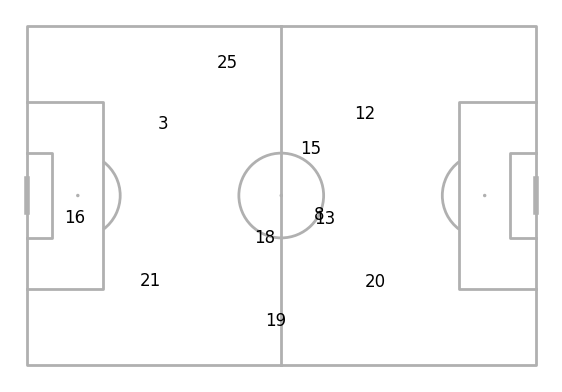

In [335]:
# Plot the average locations
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
pitch = Pitch(pitch_type='statsbomb')
pitch.draw(ax=ax)
for i, player in average_locations.iterrows():
    ax.text(player['x'], player['y'], i, color='black', fontsize=12, ha='center')
plt.show()

In analyzing Cameroon’s offensive setup, a few key observations about Chupo-Moting’s style of play emerge. The data shows that Chupo-Moting tends to drop significantly deeper to pass than the wide forwards around him, B. Mbuemo and K. Toko Ekambi. Mbuemo, a 25-year-old left-footed right-forward for Brentford in the Premier League, has a current season rating of 7.43 on WhoScored.com, ranking him 16th among players in the top 5 European leagues. This ranking, just ahead of players like Cole Palmer and Erling Haaland, highlights Mbuemo’s high level of attacking productivity. His output is driven by his direct style of play, technical excellence when needed, and a potent mix of pace and strength. Ekambi, a 32-year-old right-footed left-forward for Al-Ettifaq in the Saudi Pro League, is known for his pace, strength, and relentlessness, having been named La Liga Player of the Month with Villareal in October 2019. Ekambi, like Mbuemo, plays a tactical role in providing service to more lethal, central finishers who arrive late into the box. V. Aboubakar, a player with a similar profile to Mbuemo and Ekambi, was substituted in and made the penetrating runs that assisted Chupo-Moting’s goal in the 66th minute. Chupo-Moting, suited for a target-man role, stands out due to his technical ability, which makes him a great fit to unlock more explosive, creative players around him in exchange for providing them with chances. His passing patterns further confirm that he is adept at distributing the ball. I will delve deeper into this aspect of his play later in the analysis.

Chupo-Moting’s involvement in deeper positions also led to a Serbian goal. After picking up the ball deep in his own half, Chupo-Moting fired an incomplete 5-yard pass to a Cameroon CM. Faced with a Serbian, numerically-advantaged break, Cameroon committed a foul about 40 yards from goal. The resulting set piece was converted by Serbia just before halftime. This incident underscores the dual nature of Chupo-Moting’s playstyle—while his deeper movements are often intended to support buildup play, they also risk disrupting the team’s defensive balance. His hold-up and target-man style can be crucial in maintaining possession under pressure, but the turnover on this occasion led to a dangerous counterattack. 

Cameroon maintained a significant gap between defenders and midfielders, as shown in the chart. #18 Martin Hongla (CM) and #15 Pierre Kunde’s (CM) average positions were very far from the back line, meaning Cameroon wasn’t well set-up for losing the ball in central areas. Playing Chupo-Moting increases the likelihood of these types of ball losses due to his hold-up play being essential for advancing the ball up the field. When strikers receive these types of passes, their backs are often to goal and under intense pressure from center-backs or defensive midfielders who have tracked their movement. This creates a greater risk of turnovers, leaving the team vulnerable to counterattacks. 

Thus, if Chupo-Moting is to play, it’s crucial to ensure a well-structured safety net in midfield, helping to cover for these potential turnovers and balance the team defensively when the ball is lost. As the Red Bulls look to integrate Chupo-Moting into their squad, these passing networks and tactical patterns will be key in understanding how his movement and link-up play fit into their system. Further analysis of Cameroon’s passing networks during their World Cup run, and specifically in this game, follows.

In [336]:
# Create a passes dataframe
pass_between = successful.groupby(['passer','pass_recipient']).id.count().reset_index()
pass_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)
pass_between

,passer,pass_recipient,pass_count
0,3,8,1
1,3,12,2
2,3,13,1
3,3,16,6
4,3,18,1
...,...,...,...
74,25,13,3
75,25,15,2
76,25,16,1
77,25,18,1


In [337]:
# Merge the passes dataframe with the average locations
pass_between = pd.merge(pass_between, average_locations, left_on='passer', right_index=True)
pass_between

,passer,pass_recipient,pass_count,x,y,count
0,3,8,1,32.105882,24.041176,17
1,3,12,2,32.105882,24.041176,17
2,3,13,1,32.105882,24.041176,17
3,3,16,6,32.105882,24.041176,17
4,3,18,1,32.105882,24.041176,17
...,...,...,...,...,...,...
74,25,13,3,47.235000,9.600000,20
75,25,15,2,47.235000,9.600000,20
76,25,16,1,47.235000,9.600000,20
77,25,18,1,47.235000,9.600000,20


In [338]:
# Add the average locations of the recipients
pass_between = pass_between.merge(average_locations, left_on='pass_recipient', right_index=True, suffixes=['', '_end'])
pass_between

,passer,pass_recipient,pass_count,x,y,count,x_end,y_end,count_end
0,3,8,1,32.105882,24.041176,17,68.875000,45.537500,16
1,3,12,2,32.105882,24.041176,17,79.633333,21.666667,9
2,3,13,1,32.105882,24.041176,17,70.281250,46.462500,16
3,3,16,6,32.105882,24.041176,17,11.290476,46.352381,21
4,3,18,1,32.105882,24.041176,17,56.161538,50.984615,26
...,...,...,...,...,...,...,...,...,...
74,25,13,3,47.235000,9.600000,20,70.281250,46.462500,16
75,25,15,2,47.235000,9.600000,20,66.864286,30.078571,14
76,25,16,1,47.235000,9.600000,20,11.290476,46.352381,21
77,25,18,1,47.235000,9.600000,20,56.161538,50.984615,26


Now that I have made the complete passes dataframe, I can create the visualization of Cameroon's Pass Network with the mplsoccer library.

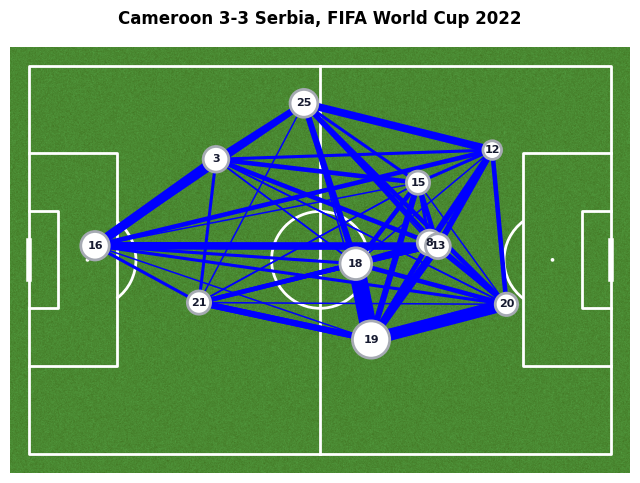

In [339]:
pitch = Pitch(pitch_color='grass', line_color='white')
# Set the figure size
fig, ax = pitch.draw(figsize=(8, 6), constrained_layout=True, tight_layout=False)

# Draw arrows and nodes
# arrows = pitch.arrows(1.2 * pass_between.x, 0.8 * pass_between.y, 1.2 * pass_between.x_end, 0.8 * pass_between.y_end, ax=ax,color='red', alpha=0.4,width=3)
pass_lines = pitch.lines(1.2*pass_between.x, 0.8*pass_between.y, 1.2*pass_between.x_end, 0.8*pass_between.y_end, lw=pass_between.pass_count*1.1,color='blue', zorder=1, ax=ax)
                 
nodes = pitch.scatter(1.2 * average_locations.x, 0.8 * average_locations.y, s=20*average_locations['count'].values, color='white', edgecolors='#a6aab3', linewidth=2, alpha=1, zorder=1, ax=ax)

                 
# Annotate average_locations
for index, row in average_locations.iterrows():
    pitch.annotate(index, xy=(1.2 * row.x, 0.8 * row.y), c='#161A30',fontweight='bold', va='center', ha='center', size=8, ax=ax)

# Add the title
ax.set_title('Cameroon 3-3 Serbia, FIFA World Cup 2022', color='black', va='center', ha='center', fontsize=12,fontweight='bold',pad=20,loc='center')

plt.show()

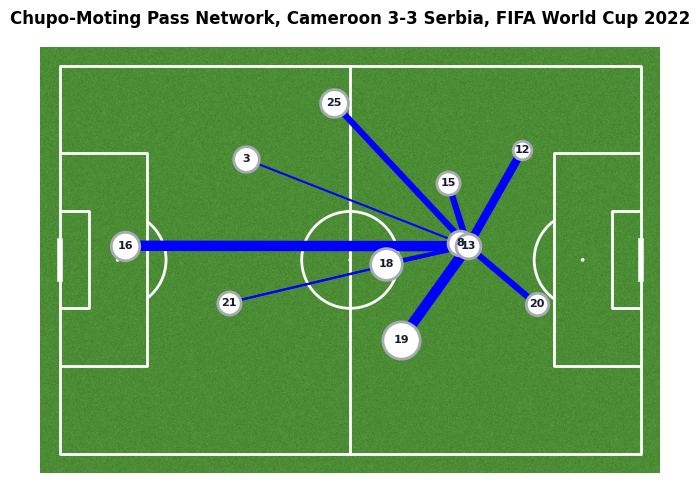

In [340]:
import pandas as pd

# Filter for Chupo-Moting's pass-betweens
chupo_pass_between = pass_between[(pass_between['passer'] == 13) | (pass_between['pass_recipient'] == 13)]

# Plot the average locations for Chupo-Moting's pass-betweens
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
pitch = Pitch(pitch_color='grass', line_color='white')
pitch.draw(ax=ax)

# Draw lines for Chupo-Moting's pass-betweens
pitch.lines(1.2 * chupo_pass_between.x, 0.8 * chupo_pass_between.y, 
            1.2 * chupo_pass_between.x_end, 0.8 * chupo_pass_between.y_end, 
            lw=chupo_pass_between.pass_count * 1.5, color='blue', zorder=1, ax=ax)

# Draw nodes for all players involved in Chupo-Moting's pass-betweens
involved_players = pd.concat([chupo_pass_between['passer'], chupo_pass_between['pass_recipient']]).unique()
for player in involved_players:
    pitch.scatter(1.2 * average_locations.loc[average_locations.index == player, 'x'], 
                  0.8 * average_locations.loc[average_locations.index == player, 'y'], 
                  s=20 * average_locations.loc[average_locations.index == player, 'count'].values, 
                  color='white', edgecolors='#a6aab3', linewidth=2, alpha=1, zorder=1, ax=ax)

# Annotate average locations for all players involved in Chupo-Moting's pass-betweens
for index, row in average_locations.iterrows():
    if index in involved_players:
        pitch.annotate(index, xy=(1.2 * row.x, 0.8 * row.y), c='#161A30', fontweight='bold', 
                       va='center', ha='center', size=8, ax=ax)

# Add the title
ax.set_title('Chupo-Moting Pass Network, Cameroon 3-3 Serbia, FIFA World Cup 2022', 
             color='black', va='center', ha='center', fontsize=12, fontweight='bold', pad=20, loc='center')

plt.show()

In [341]:
# Create an aggregate Pass Network visual for Cameroon's three matches

# Filter for passes
cameroon_passes_agg = cameroon_events.loc[cameroon_events['type_name'] == 'Pass']
cameroon_passes_agg.columns
cameroon_passes_agg = cameroon_passes_agg[['player_name','x','y','end_x', 'end_y','pass_recipient_name','outcome_id','outcome_name']]

# Filter for successful passes
cameroon_passes_agg[cameroon_passes_agg['outcome_name'].isnull()]

,player_name,x,y,end_x,end_y,pass_recipient_name,outcome_id,outcome_name
3,Ngoran Suiru Fai Collins,48.2,31.6,48.8,24.3,Martin Hongla Yma II,NaN,NaN
6,Martin Hongla Yma II,48.6,24.3,12.0,35.5,Devis Rogers Epassy Mboka,NaN,NaN
11,Devis Rogers Epassy Mboka,13.5,43.2,30.6,43.4,Martin Hongla Yma II,NaN,NaN
13,Martin Hongla Yma II,34.7,41.9,39.2,70.1,Jean-Charles Castelletto,NaN,NaN
15,Jean-Charles Castelletto,38.1,72.9,56.1,76.5,Ngoran Suiru Fai Collins,NaN,NaN
...,...,...,...,...,...,...,...,...
4395,Jules Olivier Ntcham,50.0,50.9,69.8,75.1,Jerome Ngom Mbekeli,NaN,NaN
4398,Jerome Ngom Mbekeli,92.9,77.6,106.7,40.7,Vincent Paté Aboubakar,NaN,NaN
4404,Devis Rogers Epassy Mboka,7.0,36.1,65.6,17.1,Jean-Eric Maxim Choupo-Moting,NaN,NaN
4412,Devis Rogers Epassy Mboka,7.0,36.1,63.1,6.6,Jean-Eric Maxim Choupo-Moting,NaN,NaN
